# Exchange rates and GDP growth

In [406]:
import pandas as pd
import matplotlib.pyplot as plt
import ipywidgets as widgets
import pandas_datareader as pddr
from matplotlib_venn import venn2
import numpy as np
from matplotlib.ticker import MaxNLocator

# autoreload modules when code is run
%load_ext autoreload
%autoreload 2

# local modules
import dataproject

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Importing and cleaning data

## Exchange rate data

In [419]:
#the data of exchange rates is loaded
er = pd.read_excel('VALUTAKURSER.xls', skiprows=3, index_col=0)

#dropping unused columns and choosing appropriate time frame
er.drop(er.loc[:, 'Indicator Name':'1998'].columns, axis = 1, inplace=True)
er.drop(['2019'], axis=1, inplace=True)

#renaming column
er.rename(columns = {'Country Code':'Country_Code'}, inplace=True)

#printing modified data
er.head(9)

,Country_Code,1999,2000,2001,2002,2003,2004,2005,2006,2007,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
Country Name,,,,,,,,,,,,,,,,,,,,,
Aruba,ABW,1.790000,1.790000,1.790000,1.790000,1.790000,1.790000,1.790000,1.790000,1.790000,...,1.790000,1.790000,1.790000,1.790000,1.790000,1.790000,1.790000,1.790000,1.790000,1.790000
Afghanistan,AFG,46.619531,47.357575,47.500015,47.263000,48.762754,47.845312,49.494597,49.925331,49.962018,...,50.325000,46.452461,46.747008,50.921400,55.377500,57.247500,61.143462,67.866086,68.026904,72.083247
Angola,AGO,2.790706,10.040544,22.057862,43.530207,74.606301,83.541363,87.159142,80.368072,76.706143,...,79.328167,91.905720,93.934750,95.467955,96.518279,98.302417,120.060702,163.656434,165.915951,252.855748
Albania,ALB,137.690583,143.709417,143.484833,140.154516,121.863250,102.780051,99.870254,98.103377,90.427894,...,94.978120,103.936667,100.895833,108.184167,105.669167,105.480000,125.961667,124.142500,119.100000,107.989167
Andorra,AND,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Arab World,ARB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
United Arab Emirates,ARE,3.672500,3.672500,3.672500,3.672500,3.672500,3.672500,3.672500,3.672500,3.672500,...,3.672500,3.672500,3.672500,3.672500,3.672500,3.672500,3.672500,3.672500,3.672500,3.672500
Argentina,ARG,0.999500,0.999500,0.999500,3.063257,2.900629,2.923301,2.903658,3.054313,3.095649,...,3.710107,3.896295,4.110140,4.536934,5.459353,8.075276,9.233186,14.758175,16.562707,28.094992
Armenia,ARM,535.061833,539.525833,555.078258,573.353333,578.762955,533.450833,457.686941,416.040370,342.079116,...,363.283286,373.660467,372.500882,401.763976,409.625749,415.919789,477.918307,480.488151,482.716394,482.987947


In [409]:
#choosing selected countries
c_list = ['Brazil','China', 'Euro area', 'United Kingdom', 'India', 'Japan', 'South Africa', 'Russian Federation', 'United States']
er2 = er.loc[c_list,]

#printing cleaned data
er2.head(9)

,Country_Code,1999,2000,2001,2002,2003,2004,2005,2006,2007,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
Country Name,,,,,,,,,,,,,,,,,,,,,
Brazil,BRA,1.813933,1.829423,2.349632,2.920363,3.077475,2.925119,2.434390,2.175327,1.947058,...,1.999428,1.759227,1.672829,1.953069,2.156089,2.352952,3.326904,3.491313,3.191389,3.653825
China,CHN,8.278250,8.278504,8.277068,8.276957,8.277037,8.276801,8.194317,7.973438,7.607532,...,6.831416,6.770269,6.461461,6.312333,6.195758,6.143434,6.227489,6.644478,6.758755,6.615957
Euro area,EMU,0.938283,1.082705,1.116533,1.057559,0.884048,0.803922,0.803800,0.796433,0.729672,...,0.716958,0.754309,0.718414,0.778338,0.752945,0.752728,0.901296,0.903421,0.885206,0.846773
United Kingdom,GBR,0.618057,0.660931,0.694655,0.667223,0.612472,0.546180,0.549998,0.543487,0.499772,...,0.641919,0.647179,0.624141,0.633047,0.639661,0.607730,0.654545,0.740634,0.776977,0.749532
India,IND,43.055428,44.941605,47.186414,48.610319,46.583284,45.316467,44.099975,45.307008,41.348533,...,48.405267,45.725812,46.670467,53.437233,58.597845,61.029514,64.151944,67.195313,65.121569,68.389467
Japan,JPN,113.906805,107.765498,121.528948,125.388019,115.933464,108.192569,110.218212,116.299312,117.753529,...,93.570089,87.779875,79.807020,79.790455,97.595658,105.944781,121.044026,108.792900,112.166141,110.423179
South Africa,ZAF,6.109484,6.939828,8.609181,10.540747,7.564749,6.459693,6.359328,6.771549,7.045365,...,8.473674,7.321222,7.261132,8.209969,9.655056,10.852656,12.758931,14.709611,13.323801,13.233926
Russian Federation,RUS,24.619900,28.129167,29.168525,31.348483,30.692025,28.813742,28.284442,27.190958,25.580845,...,31.740358,30.367915,29.382341,30.839831,31.837144,38.378207,60.937650,67.055933,58.342801,62.668133
United States,USA,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [421]:
#columns are renamed to include a stubname
mydick = {str(i):f'Exchange_rate{i}' for i in range(1999,2019)}
er2.rename(columns = mydick, inplace=True)

#cleaned data is converted to long format to enable easier user with pandas
er2_long = pd.wide_to_long(er2, stubnames = 'Exchange_rate', i='Country_Code', j='year').reset_index()

#the long format is displayed
er2_long.head(180)

,Country_Code,year,Exchange_rate
0,BRA,1999,1.813933
1,CHN,1999,8.278250
2,EMU,1999,0.938283
3,GBR,1999,0.618057
4,IND,1999,43.055428
...,...,...,...
175,IND,2018,68.389467
176,JPN,2018,110.423179
177,ZAF,2018,13.233926
178,RUS,2018,62.668133


## GDP growth data

In [411]:
#the data of GDP growth is loaded
gdpg = pd.read_excel('BNPVÆKST.xls', skiprows=3, index_col=0)

#dropping unused columns and choosing appropriate time frame
gdpg.drop(gdpg.loc[:, 'Indicator Name':'1998'].columns, axis = 1, inplace=True)
gdpg.drop(['2019'], axis=1, inplace=True)

#renaming column
gdpg.rename(columns = {'Country Code':'Country_Code'}, inplace=True)

#implementing our chosen countries in the GDP data
gdpg2 = gdpg.loc[c_list,]

#printing cleaned data
gdpg2.head(9)

#columns are renamed to include a stubname
gdpg2.rename(columns = {str(i):f'GDP_growth{i}' for i in range(1999,2019)}, inplace=True)

#cleaned data is converted to long format to enable easier user with pandas
gdpg2_long = pd.wide_to_long(gdpg2, stubnames='GDP_growth', i='Country_Code', j='year').reset_index()

#long format data is printed
gdpg2_long.head(1000)

,Country_Code,year,GDP_growth
0,BRA,1999,0.467938
1,CHN,1999,7.667486
2,EMU,1999,2.975615
3,GBR,1999,3.428223
4,IND,1999,8.845756
...,...,...,...
175,IND,2018,6.811369
176,JPN,2018,0.788456
177,ZAF,2018,0.787056
178,RUS,2018,2.254804


## Explore data set

In [426]:
#a function is defined to decide variables for plot
def plot_er_gdpg(er2,gdpg2,dataset, Country_Code): 
    
    #An if-statement is made differentiate between either exchange rate or GDP growth
    if dataset == 'Exchange_rate':
        df = er2
        y = 'Exchange_rate'
    else:
        df = gdpg2
        y = 'GDP_growth'
    
    I = df['Country_Code'] == Country_Code
    #the x-values are set to be the years while the y-values takes on either GDP or exchange rate
    ax = df.loc[I,:].plot(x='year', y=y, style='-')
    #We ensure that the x-axis values are integers
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))


The **interactive plot** is:

In [427]:
#an interactive figure is made
widgets.interact(plot_er_gdpg, 
    #the widgets are constructed in order to choose between the different countries as well as exchange rate or GDP growth
    er2 = widgets.fixed(er2_long),
    gdpg2 = widgets.fixed(gdpg2_long),
    dataset = widgets.Dropdown(description='Dataset', 
                               options=['Exchange_rate','GDP_growth']),
    Country_Code = widgets.Dropdown(description='Country_Code',
                 options=er2_long.Country_Code.unique())
); 

plt.show()

interactive(children=(Dropdown(description='Dataset', options=('Exchange_rate', 'GDP_growth'), value='Exchange…

The exchange rate is measured against the USD. This is why the US exchange rate appears to be constant.

In [433]:
#A single country is chosen show correlation between exchange rates and GDP
#The data is extracted
JPN_G = gdpg2_long.loc[gdpg2_long['Country_Code'] == 'JPN', :]
JPN_E = er2_long.loc[er2_long['Country_Code'] == 'JPN', :]

#The Japanese exchange rate and GDP growth are merged
mergedJPN = pd.merge(JPN_G, JPN_E, how='inner',on=['Country_Code','year'])


mergedJPN.head(1000)

,Country_Code,year,GDP_growth,Exchange_rate
0,JPN,1999,-0.251954,113.906805
1,JPN,2000,2.779633,107.765498
2,JPN,2001,0.406336,121.528948
3,JPN,2002,0.117993,125.388019
4,JPN,2003,1.528220,115.933464
5,JPN,2004,2.204688,108.192569
6,JPN,2005,1.662670,110.218212
7,JPN,2006,1.420007,116.299312
8,JPN,2007,1.654184,117.753529
9,JPN,2008,-1.093541,103.359494


Text(0,0.5,'Local currency pr. USD')

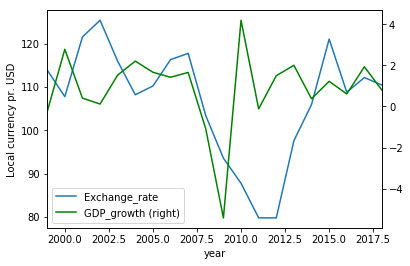

In [446]:
#A plot of the Japanese exchange rate as well as GDP growth in percent is made
ax=plt.gca()
mergedJPN.plot(x='year', y='Exchange_rate', ax=ax)
mergedJPN.plot(x='year', y='GDP_growth', ax=ax, secondary_y=True, style='g')
ax.set_ylabel("Local currency pr. USD")


# Merge data sets

We now create a data set with **municpalities which are in both of our data sets**. We can illustrate this **merge** as:

In [349]:
#data from all countries are merged
merged = pd.merge(er2_long, gdpg2_long, how='inner',on=['Country_Code','year'])

print(f'Number of countries = {len(merged.Country_Code.unique())}')
print(f'Number of years          = {len(merged.year.unique())}')

merged.head(1000)

Number of countries = 9
Number of years          = 20


,Country_Code,year,Exchange rate,GDP growth
0,BRA,1999,1.813933,0.467938
1,CHN,1999,8.278250,7.667486
2,EMU,1999,0.938283,2.975615
3,GBR,1999,0.618057,3.428223
4,IND,1999,43.055428,8.845756
...,...,...,...,...
175,IND,2018,68.389467,6.811369
176,JPN,2018,110.423179,0.788456
177,ZAF,2018,13.233926,0.787056
178,RUS,2018,62.668133,2.254804


# Analysis

To get a quick overview of the data, we show some **summary statistics by year**:

In [350]:
merged.groupby('year').agg(['mean','std']).round(2)

Exchange rate        GDP growth      
              mean    std       mean   std
year                                      
1999         22.26  37.23       4.08  3.12
2000         22.29  35.49       5.01  2.47
2001         24.44  39.72       3.22  2.50
2002         25.53  40.91       3.28  2.63
2003         23.85  38.03       4.18  3.35
2004         22.48  35.64       5.14  2.82
2005         22.44  36.19       4.92  3.21
2006         23.12  38.12       5.43  3.61
2007         22.61  38.31       5.64  4.09
2008         21.22  34.03       2.79  3.49
2009         21.49  31.77      -0.99  5.90
2010         20.24  29.87       5.00  3.13
2011         19.29  27.75       3.45  2.84
2012         20.33  28.65       2.83  2.55
2013         23.16  34.07       3.02  2.49
2014         25.23  36.84       2.73  2.74
2015         30.11  42.63       2.09  3.73
2016         30.06  40.30       2.04  3.47
2017         29.06  40.09       2.96  2.31
2018         29.73  40.43       2.73  2.35

ADD FURTHER ANALYSIS. EXPLAIN THE CODE BRIEFLY AND SUMMARIZE THE RESULTS.

# Conclusion

ADD CONCISE CONLUSION.